In [155]:
import pandas as pd
import numpy as np

In [156]:
df = pd.read_excel('Data.xlsx')

In [157]:
df.head()

,Unnamed: 0,Apple,Goole,IBM,SPX Index
0,Date,Apple_Price,Google_Price,IBM_Price,SPX_Price
1,2010-01-04 00:00:00,7.643,313.679,132.45,1132.98
2,2010-01-05 00:00:00,7.656,312.297,130.85,1136.52
3,2010-01-06 00:00:00,7.535,304.425,130,1137.14
4,2010-01-07 00:00:00,7.521,297.338,129.55,1141.7


In [158]:
df.columns = df.iloc[0]

In [159]:
df.head()

,Date,Apple_Price,Google_Price,IBM_Price,SPX_Price
0,Date,Apple_Price,Google_Price,IBM_Price,SPX_Price
1,2010-01-04 00:00:00,7.643,313.679,132.45,1132.98
2,2010-01-05 00:00:00,7.656,312.297,130.85,1136.52
3,2010-01-06 00:00:00,7.535,304.425,130,1137.14
4,2010-01-07 00:00:00,7.521,297.338,129.55,1141.7


In [160]:
df = df.iloc[1:]

In [161]:
df.head()

,Date,Apple_Price,Google_Price,IBM_Price,SPX_Price
1,2010-01-04 00:00:00,7.643,313.679,132.45,1132.98
2,2010-01-05 00:00:00,7.656,312.297,130.85,1136.52
3,2010-01-06 00:00:00,7.535,304.425,130,1137.14
4,2010-01-07 00:00:00,7.521,297.338,129.55,1141.7
5,2010-01-08 00:00:00,7.571,301.302,130.85,1144.98


In [162]:
df.Date = df.Date.dt.date

In [163]:
df.shape

(2264, 5)

In [164]:
# df.set_index('Date',inplace=True)

In [165]:
# df.head(6)

In [166]:
missing_dates = pd.date_range(df.Date.min(), df.Date.max()).difference(df.index)

In [167]:
print(missing_dates)
print(len(missing_dates))

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-09', '2010-01-10', '2010-01-11',
               '2010-01-12', '2010-01-13',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=3284, freq=None)
3284


In [168]:
# adding missing dates
idx = pd.date_range(start=df.Date.min(), end=df.Date.max())

In [169]:
df = df.set_index('Date').reindex(idx).rename_axis('Date').reset_index()

In [170]:
df.set_index('Date',inplace=True)

In [171]:
df.head(10)

,Apple_Price,Google_Price,IBM_Price,SPX_Price
Date,,,,
2010-01-04,7.643,313.679,132.45,1132.98
2010-01-05,7.656,312.297,130.85,1136.52
2010-01-06,7.535,304.425,130,1137.14
2010-01-07,7.521,297.338,129.55,1141.7
2010-01-08,7.571,301.302,130.85,1144.98
2010-01-09,NaN,NaN,NaN,NaN
2010-01-10,NaN,NaN,NaN,NaN
2010-01-11,7.504,300.846,129.48,1146.98
2010-01-12,7.419,295.526,130.51,1136.22


In [154]:
df.shape

(3284, 4)

In [173]:
# Fill all NaN with previous values
df.fillna(method='ffill',inplace=True)

In [174]:
df.head(10)

,Apple_Price,Google_Price,IBM_Price,SPX_Price
Date,,,,
2010-01-04,7.643,313.679,132.45,1132.98
2010-01-05,7.656,312.297,130.85,1136.52
2010-01-06,7.535,304.425,130.00,1137.14
2010-01-07,7.521,297.338,129.55,1141.70
2010-01-08,7.571,301.302,130.85,1144.98
2010-01-09,7.571,301.302,130.85,1144.98
2010-01-10,7.571,301.302,130.85,1144.98
2010-01-11,7.504,300.846,129.48,1146.98
2010-01-12,7.419,295.526,130.51,1136.22


In [175]:
df.isnull().sum()

0
Apple_Price     0
Google_Price    0
IBM_Price       0
SPX_Price       0
dtype: int64

In [178]:
df['Apple_Prf_Loss'] = df.Apple_Price.diff()
df['Google_Prf_Loss'] = df.Google_Price.diff()
df['IBM_Prf_Loss'] = df.IBM_Price.diff()

In [179]:
df.head()

,Apple_Price,Google_Price,IBM_Price,SPX_Price,Apple_Prf_Loss,Google_Prf_Loss,IBM_Prf_Loss
Date,,,,,,,
2010-01-04,7.643,313.679,132.45,1132.98,NaN,NaN,NaN
2010-01-05,7.656,312.297,130.85,1136.52,0.013,-1.382,-1.60
2010-01-06,7.535,304.425,130.00,1137.14,-0.121,-7.872,-0.85
2010-01-07,7.521,297.338,129.55,1141.70,-0.014,-7.087,-0.45
2010-01-08,7.571,301.302,130.85,1144.98,0.050,3.964,1.30


In [180]:
df = df.dropna()

In [182]:
df.head()

,Apple_Price,Google_Price,IBM_Price,SPX_Price,Apple_Prf_Loss,Google_Prf_Loss,IBM_Prf_Loss
Date,,,,,,,
2010-01-05,7.656,312.297,130.85,1136.52,0.013,-1.382,-1.60
2010-01-06,7.535,304.425,130.00,1137.14,-0.121,-7.872,-0.85
2010-01-07,7.521,297.338,129.55,1141.70,-0.014,-7.087,-0.45
2010-01-08,7.571,301.302,130.85,1144.98,0.050,3.964,1.30
2010-01-09,7.571,301.302,130.85,1144.98,0.000,0.000,0.00


In [200]:
# creating corelation matrix. 
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pl

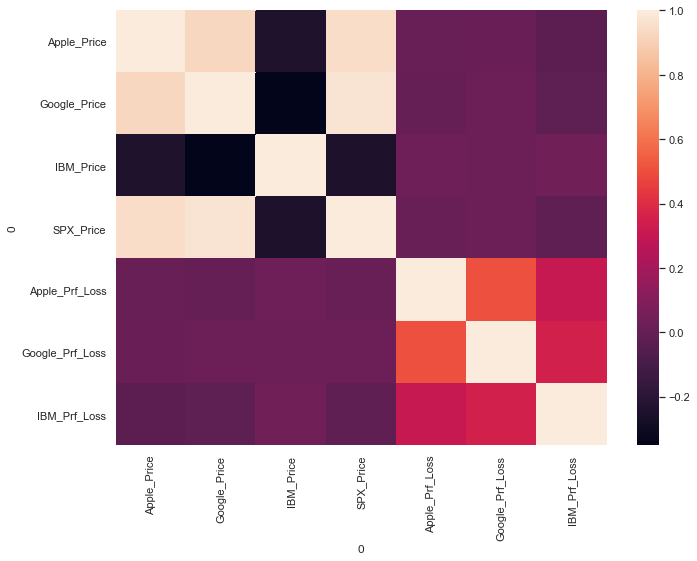

In [229]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df.corr())

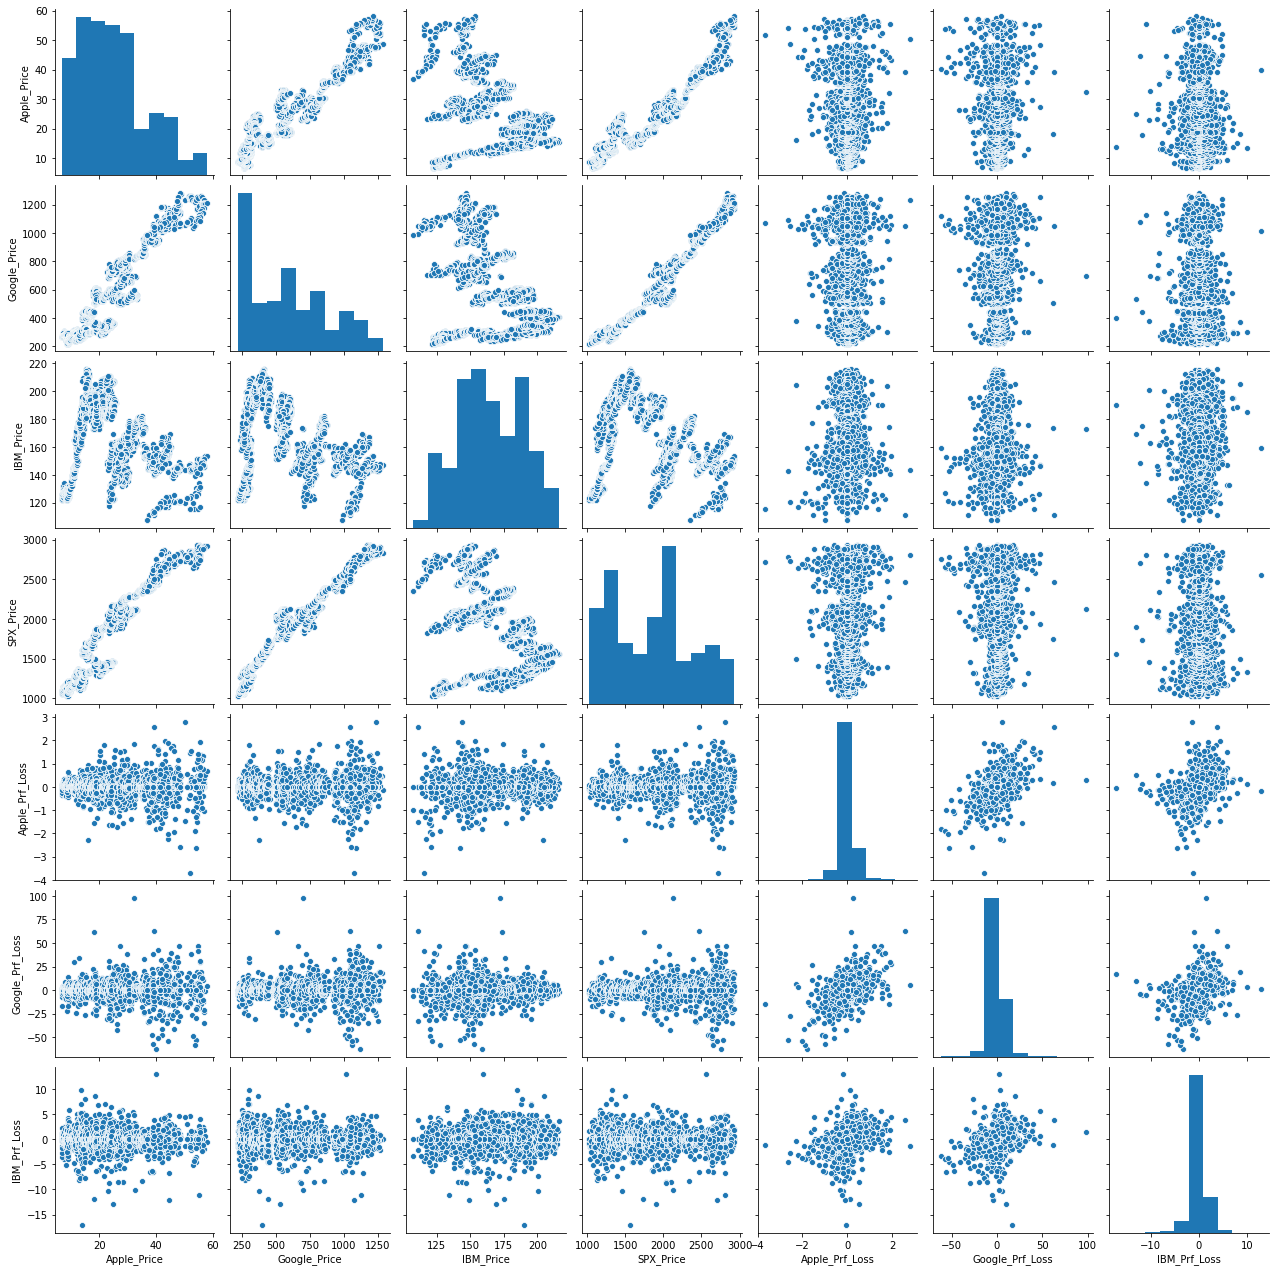

In [221]:
# Analyzing relationships between features
sns.pairplot(df)

In [192]:
# Performing OLS regression 
import statsmodels.api as sm

In [194]:
X = df.loc[:,df.columns != 'SPX_Price']
X = sm.add_constant(X)
Y = df['SPX_Price']

In [195]:
X.head()

,const,Apple_Price,Google_Price,IBM_Price,Apple_Prf_Loss,Google_Prf_Loss,IBM_Prf_Loss
Date,,,,,,,
2010-01-05,1.0,7.656,312.297,130.85,0.013,-1.382,-1.60
2010-01-06,1.0,7.535,304.425,130.00,-0.121,-7.872,-0.85
2010-01-07,1.0,7.521,297.338,129.55,-0.014,-7.087,-0.45
2010-01-08,1.0,7.571,301.302,130.85,0.050,3.964,1.30
2010-01-09,1.0,7.571,301.302,130.85,0.000,0.000,0.00


In [196]:
Y.head()

Date
2010-01-05    1136.52
2010-01-06    1137.14
2010-01-07    1141.70
2010-01-08    1144.98
2010-01-09    1144.98
Name: SPX_Price, dtype: float64

In [197]:
OLS_model = sm.OLS(Y,X) 
OLS_results = OLS_model.fit()

In [198]:
OLS_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SPX_Price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.566e+04
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:34:59   Log-Likelihood:                -19625.
No. Observations:                3283   AIC:                         3.926e+04
Df Residuals:                    3276   BIC:                         3.931e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             475.5622     14.286     33.289      0.000     447.552     503.572
Apple_Price        12.2544      0.401     30.556      0.000      11.468      13.041
Google_Price        1.3431      0.017     79.886      0.000       1.310       1.376
IBM_Price           1.7104      0.077     22.250      0.000       1.560       1.861
Apple_Prf_Loss     -0.7391      5.484     -0.135      0.893     -11.492      10.013
Google_Prf_Loss    -0.2263      0.248     -0.913      0.362      -0.713       0.260
IBM_Prf_Loss        0.6352      1.087      0.584      0.559      -1.496       2.767
==============================================================================
Omnibus:                      154.566   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.883
Skew:                           0.553   Prob(JB):                     6.42e-39
Kurtosis:                       3.250   Cond. No.                     5.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [202]:
# Model using only profit/Loss
import statsmodels.formula.api as smf

In [203]:
OSL_MODEL_2 = smf.ols(formula='SPX_Price ~ Apple_Prf_Loss + Google_Prf_Loss + IBM_Prf_Loss', data=df).fit()

In [204]:
OSL_MODEL_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SPX_Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.139
Date:                Mon, 23 Nov 2020   Prob (F-statistic):              0.332
Time:                        22:57:05   Log-Likelihood:                -25189.
No. Observations:                3283   AIC:                         5.039e+04
Df Residuals:                    3279   BIC:                         5.041e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1856.7397      9.084    204.391      0.000    1838.928    1874.551
Apple_Prf_Loss      5.9653     29.834      0.200      0.842     -52.529      64.460
Google_Prf_Loss     1.7473      1.349      1.295      0.195      -0.897       4.392
IBM_Prf_Loss       -8.7719      5.912     -1.484      0.138     -20.362       2.819
==============================================================================
Omnibus:                      939.305   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.280
Skew:                           0.216   Prob(JB):                     2.36e-38
Kurtosis:                       1.961   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

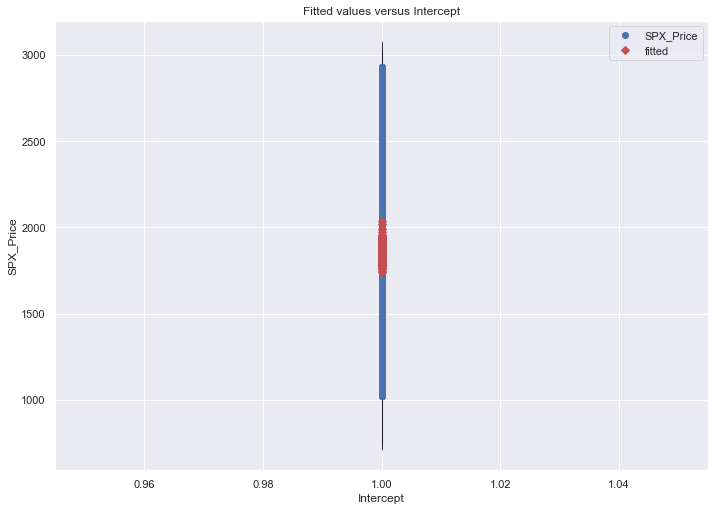

In [234]:
fig, ax = pl.subplots()
fig = sm.graphics.plot_fit(OSL_MODEL_2, 0, ax=ax)

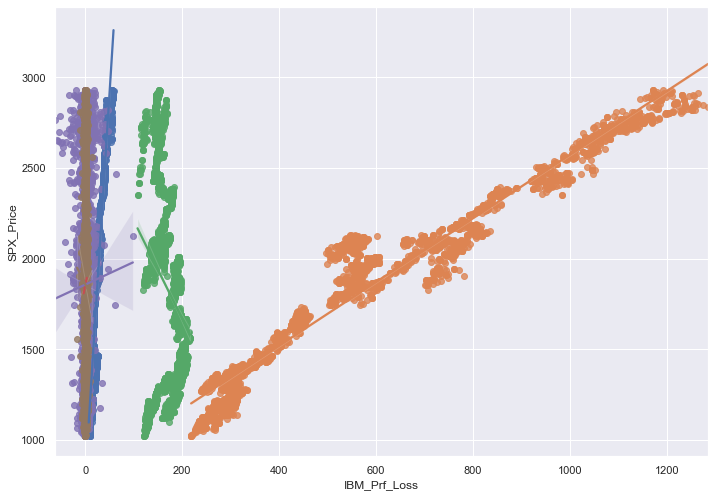

In [233]:
for i in X.columns:
    if(i != 'const'):
        sns.regplot(data = df,x=i,y=Y)